In [1]:
#import packages necessary
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the data describing the edges
data = pd.read_csv("./data/relations.csv")

#node labels
label = pd.read_csv("./data/characters.csv")

#defining an empty graph
G_hp = nx.Graph()

In [3]:
#adding the edges to the graph
for _, edge in data.iterrows():
    G_hp.add_edge(edge['source'], edge['target'])

#adding the weights to the edges
for u, v in G_hp.edges():
    G_hp[u][v]["weight"] = G_hp.degree(u) + G_hp.degree(v)

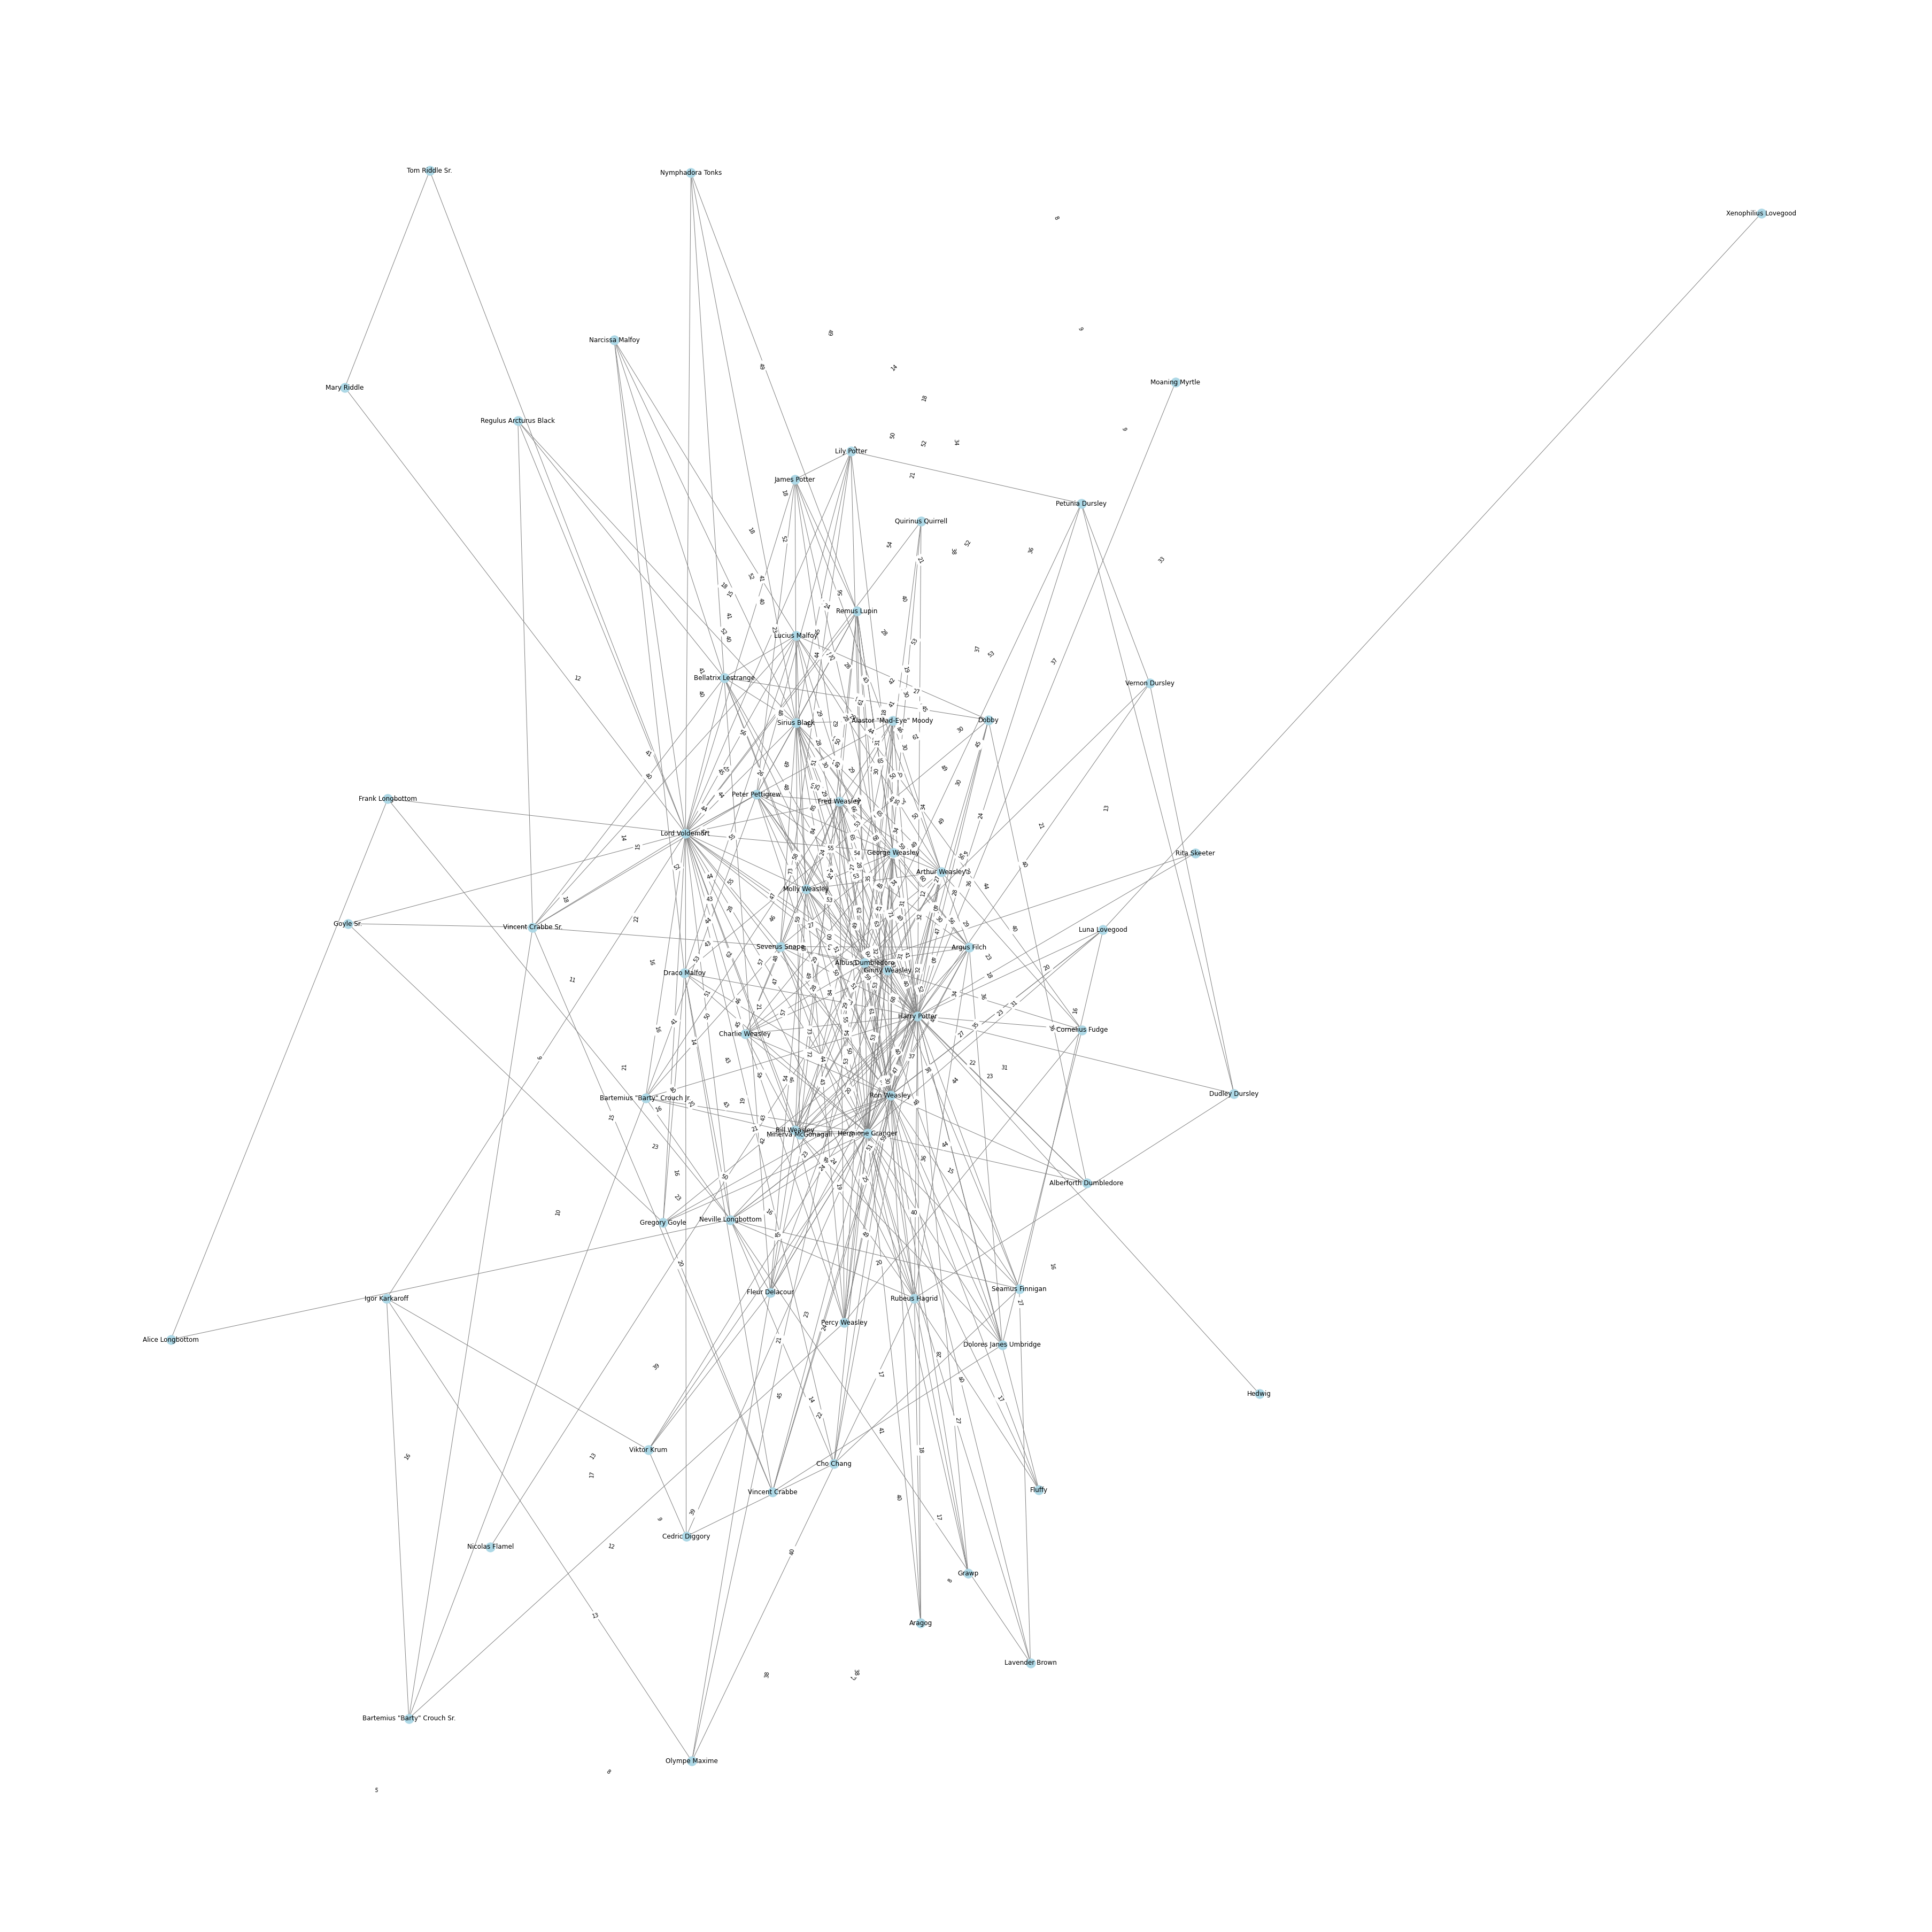

In [4]:
plt.figure(figsize=(50,50))

#labeling the nodes
labels = {row["id"]: row["name"] for index, row in label.iterrows()}

nx.set_node_attributes(G_hp, labels, "name")

#drawing the graph
pos = nx.spring_layout(G_hp)  
node_labels = nx.get_node_attributes(G_hp, "name")
edge_labels = {(u, v): d["weight"] for u, v, d in G_hp.edges(data=True)}
nx.draw(G_hp, with_labels=True, labels=node_labels, node_color='lightblue', edge_color="gray")
nx.draw_networkx_edge_labels(G_hp, pos, edge_labels=edge_labels)
plt.show()


In [5]:
import community

#partitioning the network using the louvain method
partition = community.best_partition(G_hp)

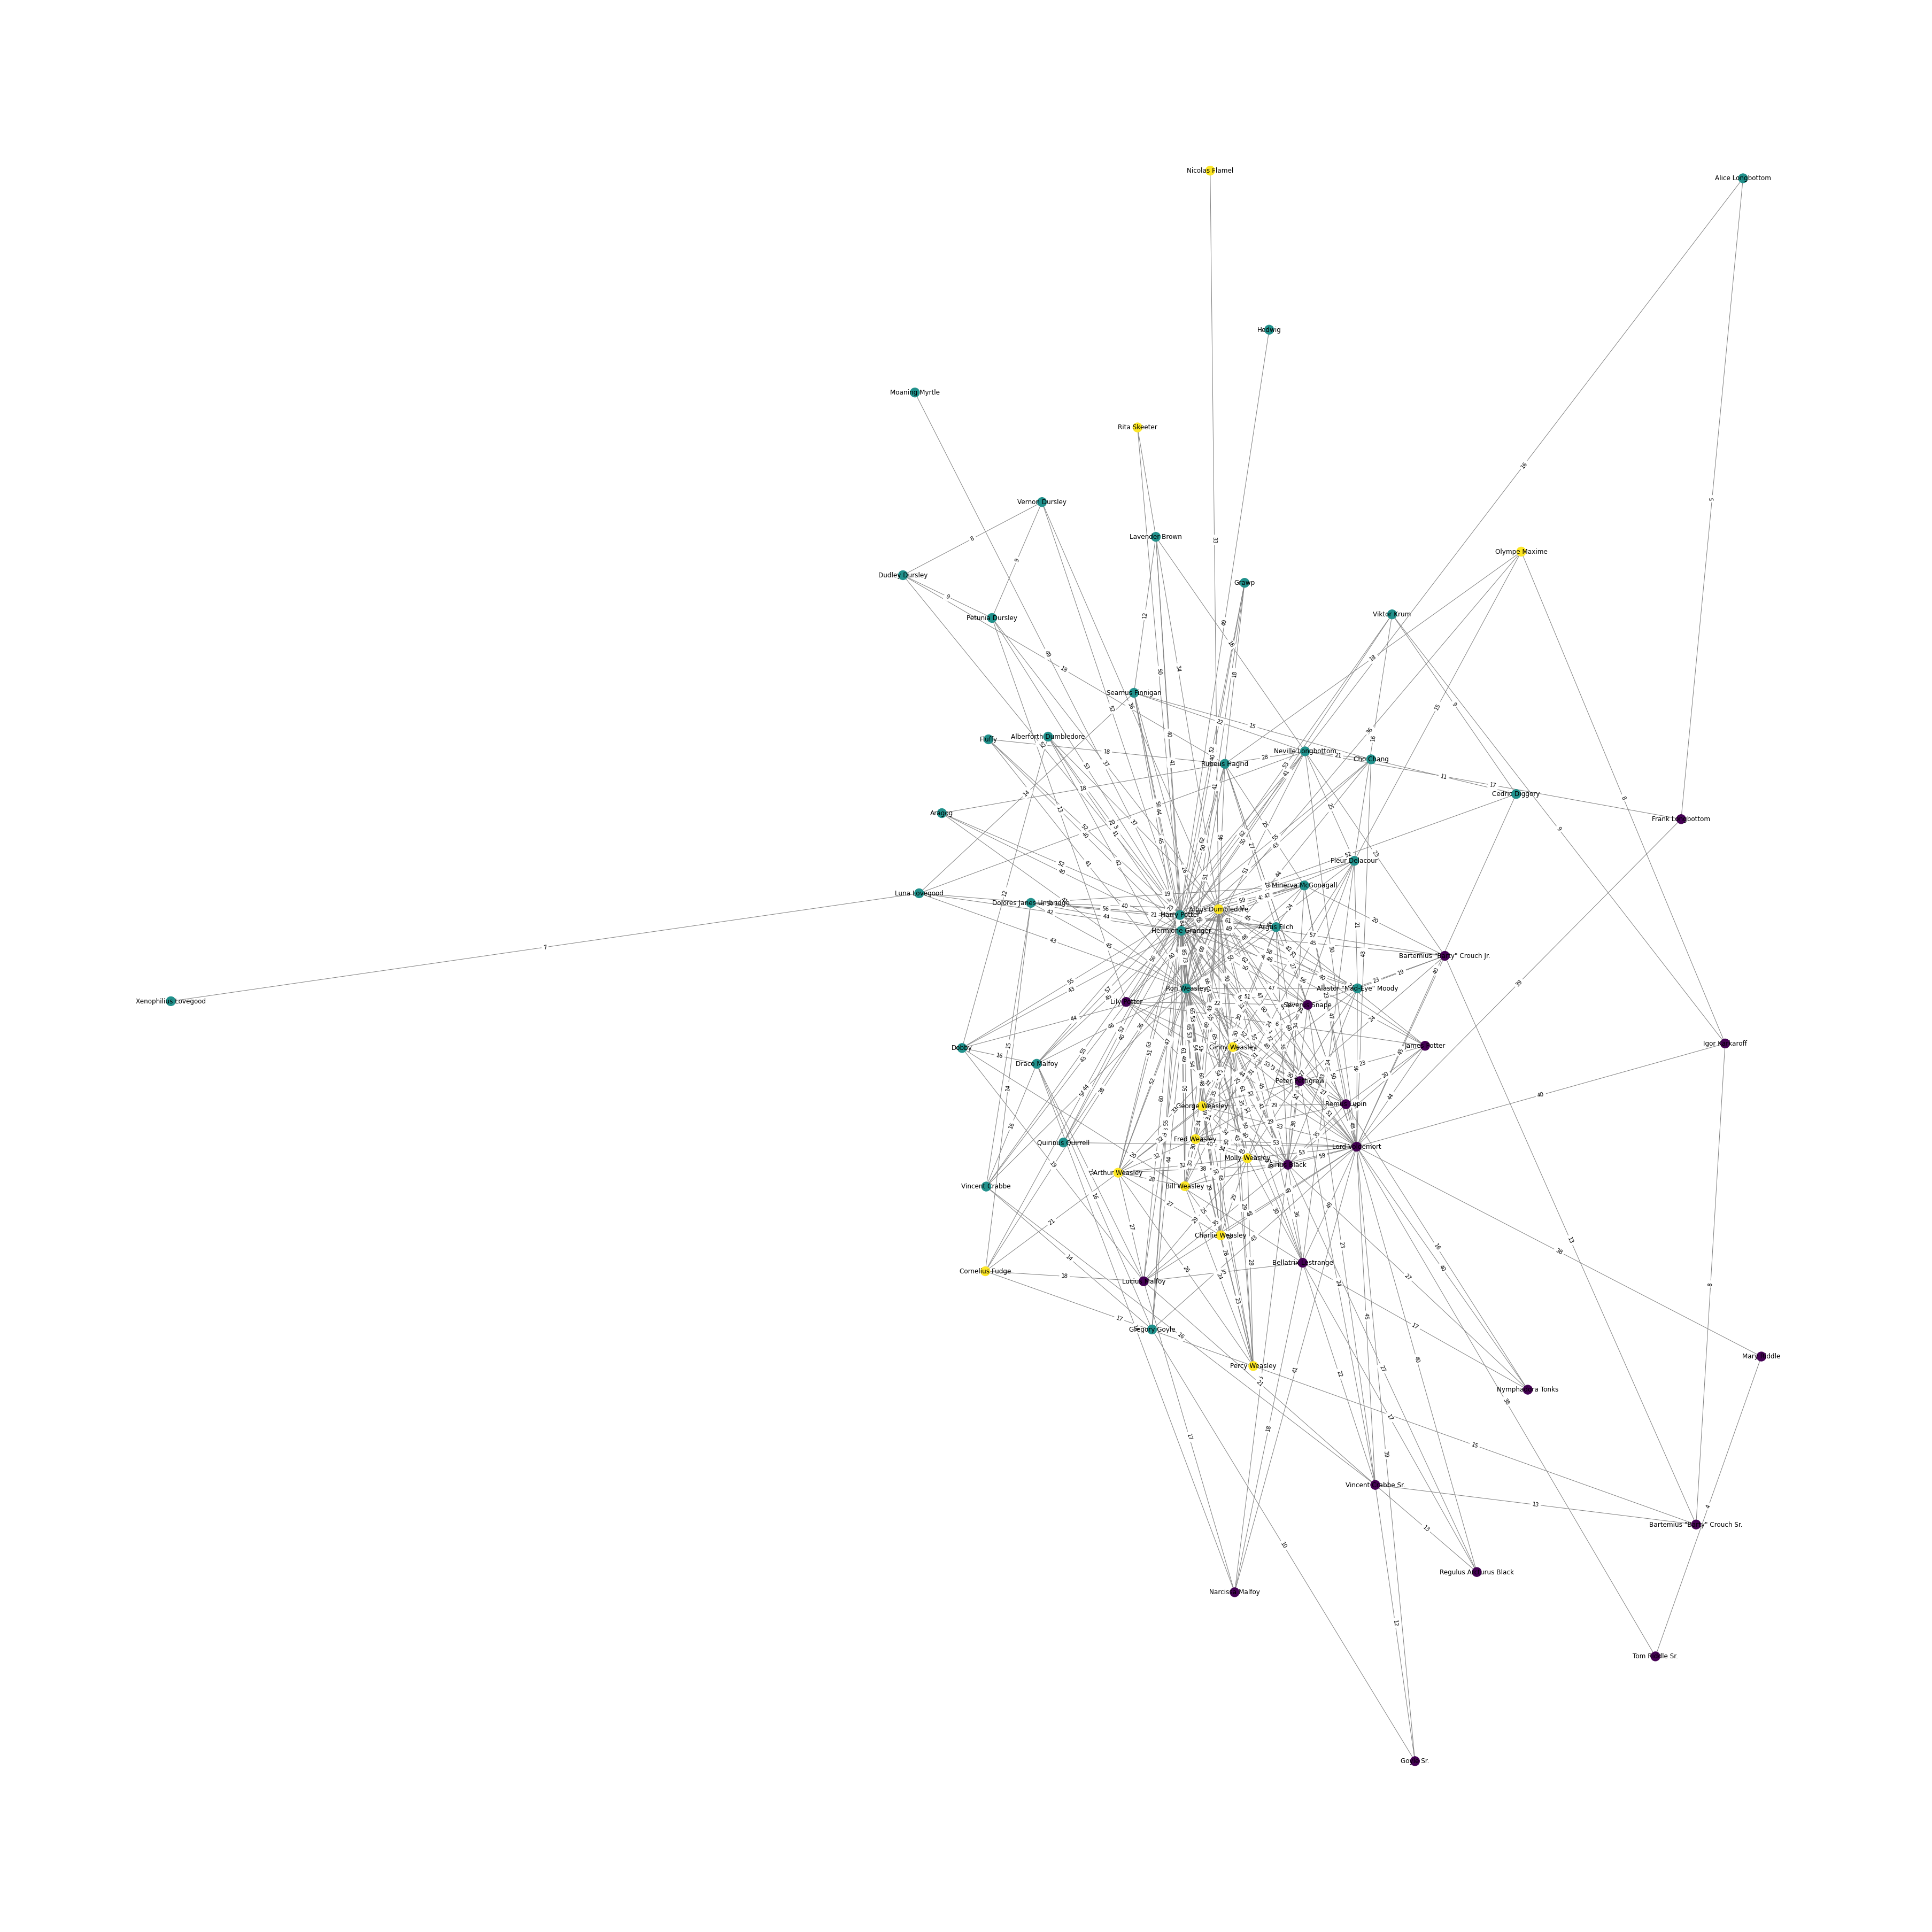

In [6]:
#coloring the graph according to the partitioning
colors = [partition[node] for node in G_hp.nodes()]

plt.figure(figsize=(50,50))
pos = nx.spring_layout(G_hp)
nx.draw(G_hp, pos, node_color=colors, with_labels=True, labels=node_labels,edge_color="gray")
nx.draw_networkx_edge_labels(G_hp, pos, edge_labels=edge_labels)
plt.show()

In [7]:
#calculating the modularity
modularity = community.modularity(partition, G_hp)
modularity

0.18524595953442047